In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
! unzip celeba-dataset.zip -d train


Archive:  celeba-dataset.zip
replace train/img_align_celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
images_dir="/content/train/img_align_celeba/img_align_celeba"
from PIL import Image
IMG_SHAPE = (64, 64)

In [ ]:
X_image_train = []
i=int(0)
for fname in os.listdir(images_dir):
  if i<50000:
    fpath = os.path.join(images_dir, fname)
    im = Image.open(fpath)
    im_resized = im.resize(IMG_SHAPE)
    X_image_train.append(im_resized)
    i=i+1

    ## Converting the image to numpy array
X_image_array=[]
for x in range(len(X_image_train)):
    X_image=np.array(X_image_train[x],dtype='uint8')
    X_image_array.append(X_image)

In [ ]:
trainX = np.array(X_image_array)


In [ ]:
trainX.shape

(50000, 64, 64, 3)

In [ ]:
import matplotlib.pyplot as pyplot

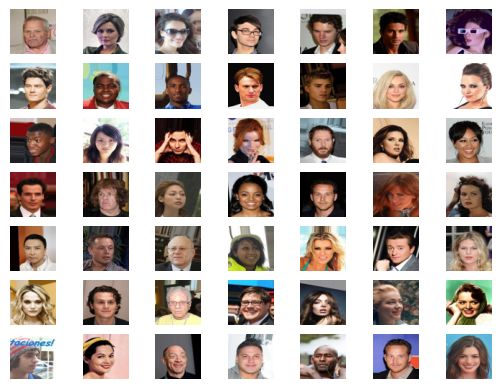

In [ ]:
for i in range(49):
  pyplot.subplot(7,7,1+i)
  pyplot.axis('off')
  pyplot.imshow(trainX[i])
pyplot.show()

since the images are 64,64 the resolution is very low

In [ ]:
trainX.shape

(50000, 64, 64, 3)

**Model Creation**

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D,Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU,Reshape
from tensorflow.keras.utils import plot_model
import numpy as np

By experimentation scientists found that LeakyReLU works better in case of GANS

# DISCRIMINATOR

In [ ]:
def define_discriminator(in_shape = (64,64,3)):
  model = Sequential()
  #normal
  model.add(Conv2D(64,(3,3),padding='same',input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))
#downsampling
  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))
#downsampling ( strides can be compared with maxpooling but it works better for GANs)
  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))
#downsampling
  model.add(Conv2D(256,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))
#Classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))
#Compiling the model
  opt = Adam(learning_rate=0.0002,beta_1=0.5)

  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          16,385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534,785 (2.04 MB)

 Trainable params: 534,785 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

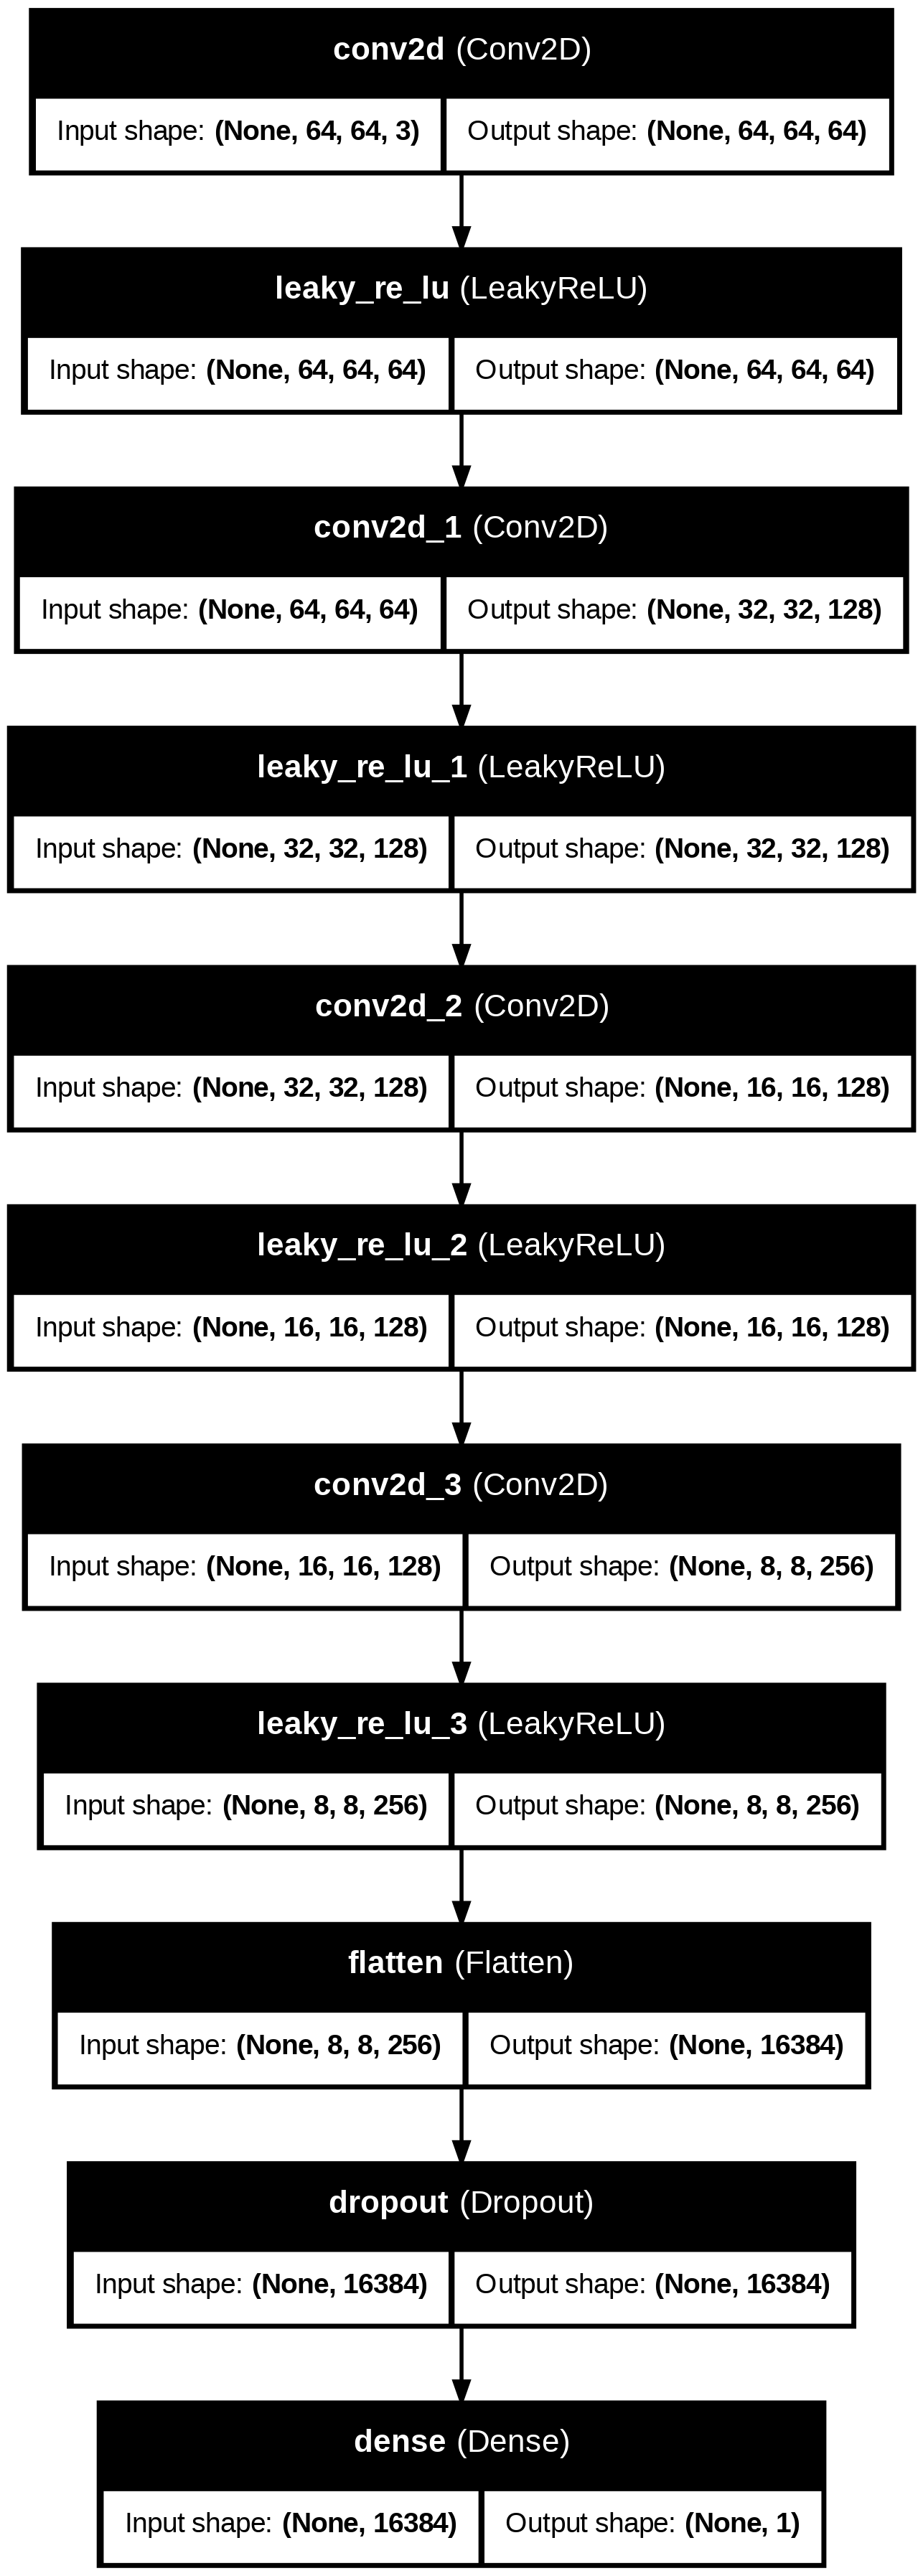

In [ ]:
model = define_discriminator()

model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

You can see the image for this plot in the /kaggle/working directory

In [ ]:
#function to import and standardize real data
def load_real_samples():
  X = trainX.astype('float32')
  X = (X-127.5)/127.5
  return X

* We won't give all the images at once to the discriminator and it won't upgrade all its weights at once
* Instead we will give it batches (exapmle : 200 images at a time )  and it will update its weight on those images , then the next batch and it will again update its weights , thus getting better at each step


In [ ]:
def generate_real_samples(dataset,n_samples):
  ix = np.random.randint(0,dataset.shape[0],n_samples)
  X = dataset[ix]
  y = np.ones((n_samples,1))
  return X,y
#X will have one batch images ( suppose 64 images at one time )
#y will store 1 so as to identify all the images in the batch are real images

In [ ]:
def generate_fake_samples(n_samples):
  X= np.random.rand(64*64*3*n_samples)
  X = -1 + X*2 # Making the value between [-1,1]
  X = X.reshape((n_samples,64,64,3))
  y = np.zeros((n_samples,1))
  return X,y
#here y will have 0 --> indicating fake images

(64, 64, 64, 3)
(64, 1)


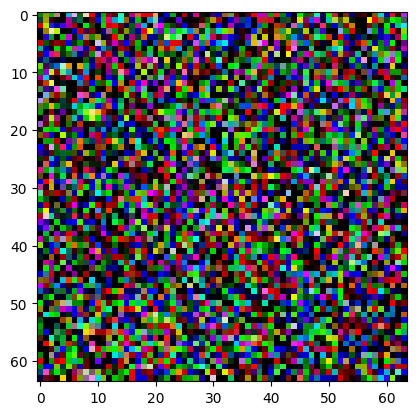

In [ ]:
X,y = generate_fake_samples(64)
pyplot.imshow(X[0])
print(X.shape)
print(y.shape)
#It will generate random noise in the starting like this image below
#This function will be helpful to train the generator

In [ ]:
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
  half_batch = int(n_batch/2)
# half real and half fake images in 1 batch of 128 pictures
  for i in range(n_iter):
    X_real,y_real = generate_real_samples(dataset,half_batch)
    #update discriminator weights on real data
    _,real_acc = model.train_on_batch(X_real,y_real)
    X_fake,y_fake = generate_fake_samples(half_batch)
    #update discriminator weights on fake data
    _,fake_acc = model.train_on_batch(X_fake,y_fake)
    print('>%d real=%f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))

# In one epoch we will update the weights 2 times (1 for real images and 1 time for the fake images)

In [ ]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model,dataset)

>1 real=45.312500% fake=23%


>2 real=48.437500% fake=36%


>3 real=49.062499% fake=42%
>4 real=50.446433% fake=50%
>5 real=55.555558% fake=60%
>6 real=63.494319% fake=67%
>7 real=69.110578% fake=71%
>8 real=73.125005% fake=75%
>9 real=76.102942% fake=77%
>10 real=78.618419% fake=80%
>11 real=80.654764% fake=82%
>12 real=82.336956% fake=83%
>13 real=83.749998% fake=84%
>14 real=84.895831% fake=85%
>15 real=85.937500% fake=86%
>16 real=86.844754% fake=87%
>17 real=87.642044% fake=88%
>18 real=88.348216% fake=89%
>19 real=88.978034% fake=89%
>20 real=89.543271% fake=90%


In just 20 epochs dicriminator is able to correctly identify real and fake images
since the fake images are random noise

*   List item

*   List item:
*   List item


*   List item



Now we will make the task of discriminator hard as we won't give just random images generated by the generate_fake_samples but we will use the GENERATOR for this purpose[link text](https://)

In [ ]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

# GENERATOR
* **A neural network**
* **input** ---- Randomly generated noise from a Gausian distribution (100 dimentional noise vector [x1,x2,x3,x4----x100]) (noise is called as latent variable -- a terminology )
* **output** --- 64*64*3 (an image output) (3 at the end specifies colour RGB value)

In [ ]:
#conv2DTranspose is used to upscale picture
#latent_dim is noise vector
#our generator wants to understand or grasp the distibution of data in our real dataset so as to generate such an image
#we start from small images 4x4 and then upscale it to 64*64

def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 256*4*4
  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))
#stride (2,2) will upscale the image to double its size 4x4 to 8x8
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

#stride (2,2) will upscale the image to double its size 8x8 to 16X16

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,728,387 (6.59 MB)

 Trainable params: 1,728,387 (6.59 MB)

 Non-trainable params: 0 (0.00 B)

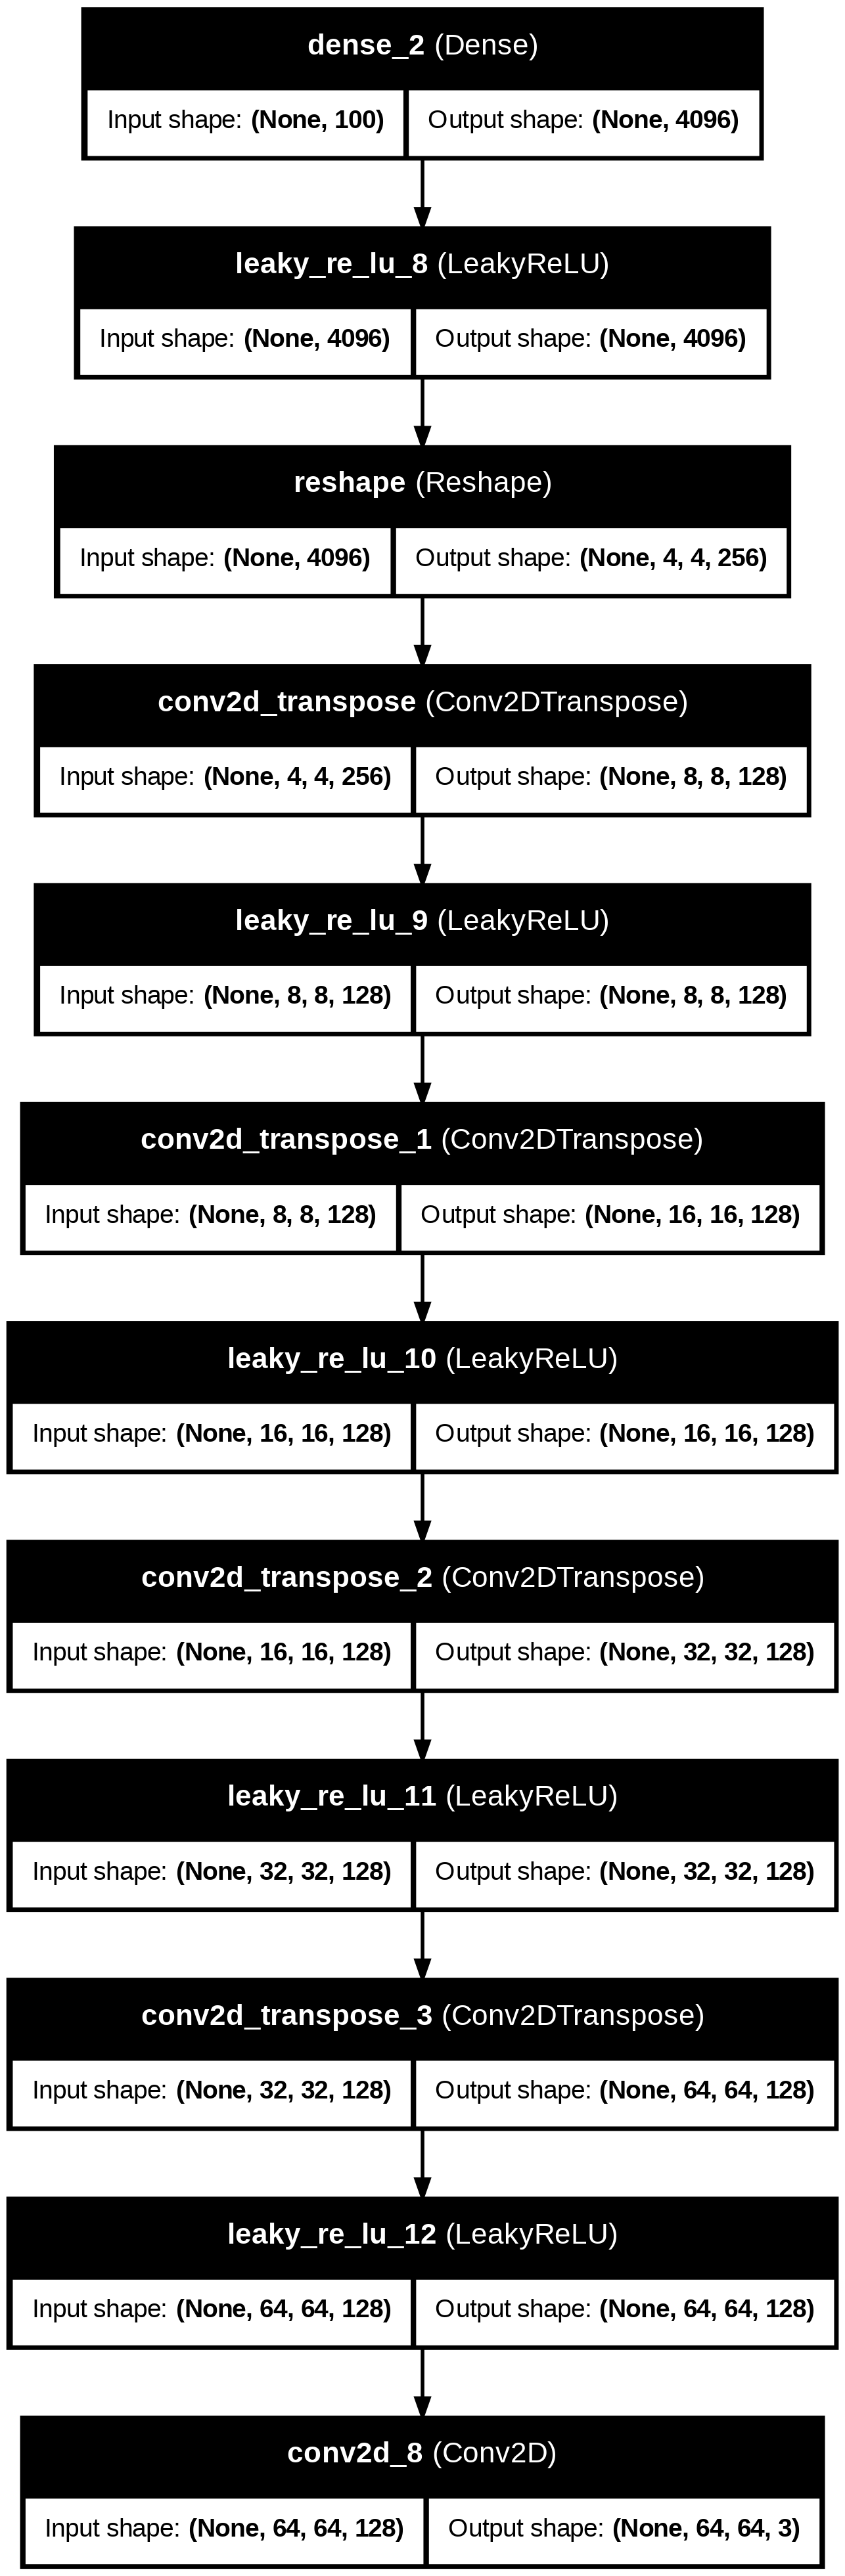

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model,to_file='genetor_plot.png',show_shapes=True,show_layer_names=True)


At the end we get 64*64*3 colour image

* Now that we have build both our generator and discriminator we will join them and make them send feedback
* It we feed 128 images to the discriminator at a time ---- 64 should come from real dataset and 64 should come from the generator

# MERGING THE GENERATOR AND DISCRIMINATOR AS ADVISORY

In [ ]:
def generate_latent_points(latent_dim,n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples,latent_dim)
    return x_input
#n_samples -->no_of_rows
#latent_points ---> no_of_columns
# If we give 64  100 dimentional noise or images to the generator ,
# it will give us 64 32x32x3 dimentional images

In [ ]:
#g_model --- GENERATOR
def generate_fake_samples(g_model,latent_dim,n_samples):
    x_input = generate_latent_points(latent_dim,n_samples)
    #fake images will now onwards be generated by the Generator not the previous function
    X = g_model.predict(x_input)
    y = np.zeros((n_samples,1))
    # y = 0 (fake images labeled as 0)
    return X,y

*we just want to see how our generator is generating images at this point (generator is not trained at this point)*

In [ ]:
import matplotlib.pyplot as pyplot

im

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 820ms/step


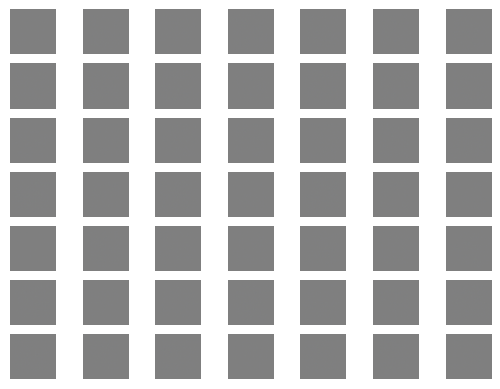

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
X,_ = generate_fake_samples(model,latent_dim,n_samples)
#_ is y , we don't need to consider now
X = (X+1)/2.0
for i in range(n_samples):
    pyplot.subplot(7,7,1+i)
    pyplot.axis('off')
    pyplot.imshow(X[i])
pyplot.show()

We have only grey images or noise as we still haven't trained it

**Finally we will now merge the GENERATOR and DISCRIMINATOR and train them simultaneously**

* define_gan is a composite model
* We will not update the weights of the discriminator while dealing with the composite model
* We will only update weights of the generator
    
* We will give a generated image with label 1 to the discriminator
* The discriminator will immediately say it is false and give 0 label
* Talking of the whole model we gave 1 input and got 0 output , therefore
* we will have to back propagate and update the weights and minimise loss
* until we get 1 as output(or ultil we fake the discriminator)
    
* we train the discriminator separately
[link text](https://)* In 1 epoch we give 64 real image , and 64 generated fake image
* And update the weight of the discriminator (2 times in 1 epoch)
    
* And then only we will train the generator through our composite model
    

In [ ]:
def define_gan(g_model,d_model):
    d_model.trainable = False

    model = Sequential()

    model.add(g_model)

    model.add(d_model)

    opt = Adam(learning_rate = 0.0002,beta_1=0.5)
    model.compile(loss = 'binary_crossentropy',optimizer = opt)
    return model

In [ ]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)

gan_model = define_gan(g_model,d_model)
gan_model.summary()
from tensorflow.keras.utils import plot_model

# plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 64, 64, 3)           │       1,728,387 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 1)                   │         534,785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,263,172 (8.63 MB)

 Trainable params: 1,728,387 (6.59 MB)

 Non-trainable params: 534,785 (2.04 MB)

The main training starts here

```
# This is formatted as code
```



In [ ]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=700,n_batch = 128):
    bat_per_epo = int(dataset.shape[0]/n_batch) #390
    half_batch = int(n_batch/2)#64
    for i in range(n_epochs):
        for j in range(bat_per_epo):

            X_real,y_real = generate_real_samples(dataset,half_batch)

            d_loss1,_ = d_model.train_on_batch(X_real,y_real)
            # _ is accuracy
            X_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)

            d_loss2,_ = d_model.train_on_batch(X_fake,y_fake)

            X_gan = generate_latent_points(latent_dim,n_batch)

            y_gan = np.ones((n_batch,1))

            g_loss = gan_model.train_on_batch(X_gan,y_gan)



            print('>%d , %d, %d'%(i+1, j+1, bat_per_epo))
            print(d_loss1,d_loss2,g_loss)

    #on every 10 epochs do this
    if (i+1) %10 ==0:
        summarize_performance(i,g_model,d_model,dataset,latent_dim)

In [ ]:
#evaluating the model

def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
    X_real,y_real = generate_real_samples(dataset,n_samples)
    _,acc_real = d_model.evaluate(X_real,y_real,verbose=0)
    x_fake,y_fake=generate_fake_samples(g_model,latent_dim,n_samples)
    _,acc_fake = d_model.evaluate(x_fake,y_fake,verbose=0)
    print('>Accuracy real %.0f%%, fake: %.0f%%'%(acc_real*100,acc_fake*100))

    #to plot the generated image
    save_plot(x_fake,epoch)

    filename='generator_model_%03d.h5' % (epoch+1)
    g_model.save(filename)

In [ ]:
#Plot generated image
def save_plot(examples,epoch,n=7):
    examples = (examples+1)/2.0

    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    filename = '/kaggle/working/generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

**It will take around 4 hours to train this model ....**[link text](https://)

```
# This is formatted as code
```



**Problem with GANs is their high hardware dependency**

**Please Upvote my notebooks if you like them**

**Thank You**

*   List item
*   List item



In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
>1 , 1, 390
0.64731896 0.67038286 [array(0.67038286, dtype=float32), array(0.67038286, dtype=float32), array(0.4921875, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>1 , 2, 390
0.66297424 0.6707344 [array(0.6707344, dtype=float32), array(0.6707344, dtype=float32), array(0.49609375, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>1 , 3, 390
0.6663951 0.6711533 [array(0.6711533, dtype=float32), array(0.6711533, dtype=float32), array(0.4947917, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>1 , 4, 390
0.6676427 0.67122275 [array(0.67122275, dtype=float32), array(0.67122275, dtype=float32), array(0.49609375, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>1 , 5, 390
0.66826475 0.6712714 [array(0.6712714, dtype=float32), array(0.6712714, dtype=float32), array(0.4953125, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>1 , 6, 390
0.6688538 0.671627 [array(0.671627, dtype=float32), array(0.671627, dtype=float32), arra

For me it stoped after 15 epochs , no messeges were printed , it just froze and I had to refresh the whole page as the stop execution button was also not working , try it on google colab with gpu
So I will run it for 10 epochs ( but that won't generate good images though)


In [ ]:
#Now let our GAN generate images , and we will print it
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

def generate_latent_points(latent_dim,n_samples):
    x_input = randn(latent_dim*n_samples)
    x_input = x_input.reshape(n_samples,latent_dim)
    return x_input
def create_plot(examples,n):
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
        pyplot.show()
# model = load_model('generator_model_10.h5')
latent_points = generate_latent_points(100,100)
x = g_model.predict(latent_points)
x = (x+1)/2.0
create_plot(x,1)
x.shape[0]


NameError: name 'g_model' is not defined

In [ ]:
#Please run it for atleast 200 epochs to see the results ( in google colab , in kaggle it freezes idk why )
# GPU T4 x2 will work better ,Thank you .